In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('/content/sample_data/TTM.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds          y
0    2020-07-13   7.090000
1    2020-07-14   7.020000
2    2020-07-15   7.020000
3    2020-07-16   6.910000
4    2020-07-17   6.950000
..          ...        ...
247  2021-07-06  20.330000
248  2021-07-07  20.510000
249  2021-07-08  19.920000
250  2021-07-09  20.379999
251  2021-07-12  20.320000

[252 rows x 2 columns]


In [3]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-07-13
1   2020-07-14
2   2020-07-15
3   2020-07-16
4   2020-07-17
..         ...
612 2022-07-08
613 2022-07-09
614 2022-07-10
615 2022-07-11
616 2022-07-12

[617 rows x 1 columns]


In [5]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
417,2021-12-25,24.746480,19.191358,30.454183
418,2021-12-26,24.761325,18.925423,30.381182
419,2021-12-27,24.697001,19.049526,30.556828
420,2021-12-28,24.907598,19.272484,30.680030
421,2021-12-29,24.934564,19.309368,30.915749
...,...,...,...,...
612,2022-07-08,27.798619,10.611022,45.393635
613,2022-07-09,27.656042,10.915609,45.151706
614,2022-07-10,27.670887,10.456607,45.607838
615,2022-07-11,27.606563,10.356833,45.506939


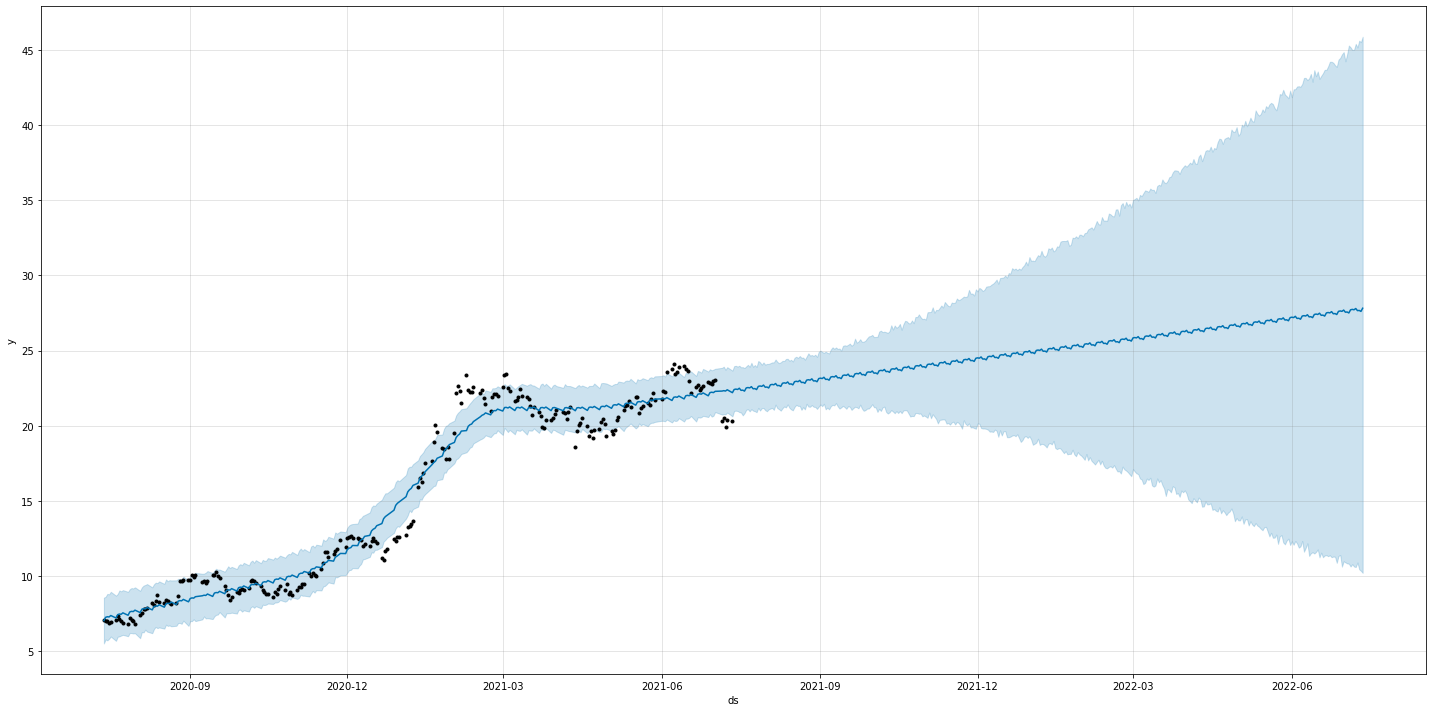

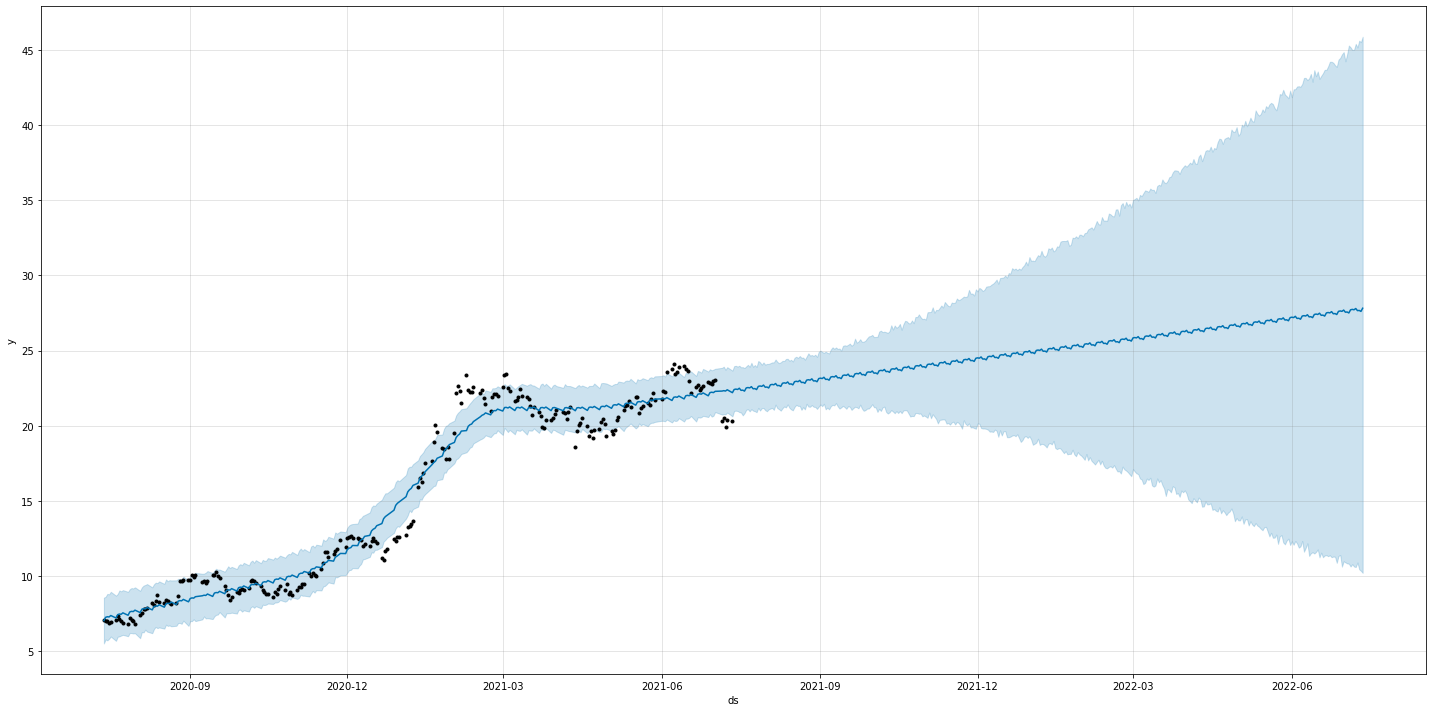

In [6]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))